In [15]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector
import warnings

In [7]:
cancer = pd.read_csv(r"C:\Training\Academy\Statistics (Python)\Cases\Wisconsin\BreastCancer.csv",index_col=0)
X = cancer.drop('Class', axis=1)
y = cancer['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.3, stratify=y)

In [11]:
rf = RandomForestClassifier(n_estimators=10, random_state=24)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [13]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9938607085346216


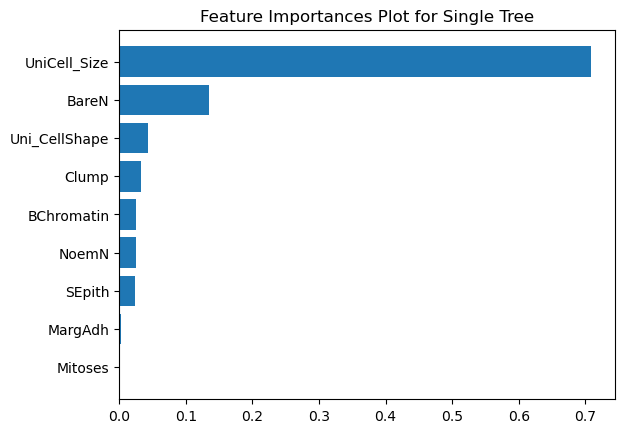

In [23]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X_train, y_train)
df_imp = pd.DataFrame({'feature':list(X.columns),
              'importance':dtc.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot for Single Tree")
plt.show()

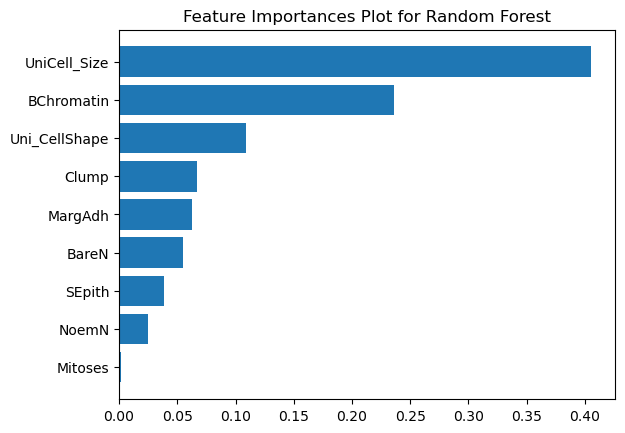

In [25]:
df_imp = pd.DataFrame({'feature':list(X.columns),
              'importance':rf.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot for Random Forest")
plt.show()

## Glass Identification

In [28]:
glass = pd.read_csv(r"C:\Training\Academy\Statistics (Python)\Cases\Glass Identification\Glass.csv")
X = glass.drop('Type', axis=1)
y = glass['Type']

In [32]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
params = {'max_features':[3,4,5],'n_estimators':[10,50,100] }
rf = RandomForestClassifier(n_estimators=10, random_state=24)
gcv = GridSearchCV(rf, param_grid=params, cv=kfold, scoring='neg_log_loss',verbose=3)
gcv.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..max_features=3, n_estimators=10;, score=-1.331 total time=   0.0s
[CV 2/5] END ..max_features=3, n_estimators=10;, score=-4.521 total time=   0.0s
[CV 3/5] END ..max_features=3, n_estimators=10;, score=-3.046 total time=   0.0s
[CV 4/5] END ..max_features=3, n_estimators=10;, score=-1.345 total time=   0.0s
[CV 5/5] END ..max_features=3, n_estimators=10;, score=-1.484 total time=   0.0s
[CV 1/5] END ..max_features=3, n_estimators=50;, score=-0.536 total time=   0.0s
[CV 2/5] END ..max_features=3, n_estimators=50;, score=-1.444 total time=   0.0s
[CV 3/5] END ..max_features=3, n_estimators=50;, score=-1.473 total time=   0.0s
[CV 4/5] END ..max_features=3, n_estimators=50;, score=-0.544 total time=   0.0s
[CV 5/5] END ..max_features=3, n_estimators=50;, score=-0.615 total time=   0.0s
[CV 1/5] END .max_features=3, n_estimators=100;, score=-0.516 total time=   0.0s
[CV 2/5] END .max_features=3, n_estimators=100;, 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=10, random_state=24),
             param_grid={'max_features': [3, 4, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_log_loss', verbose=3)

In [34]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 4, 'n_estimators': 100}
-0.6554971596052169


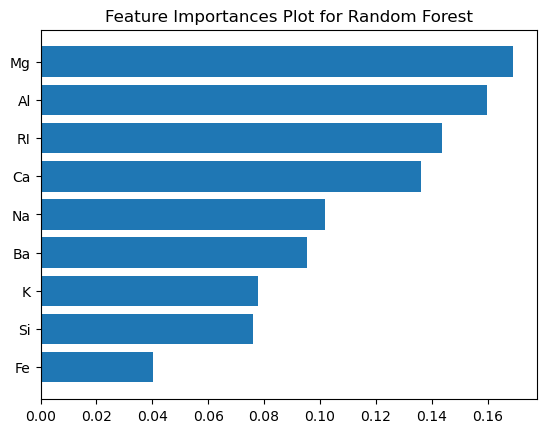

In [36]:
best_m = gcv.best_estimator_
df_imp = pd.DataFrame({'feature':list(X.columns),
              'importance':best_m.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot for Random Forest")
plt.show()